In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [116]:
df = pd.read_csv("/content/Fraud.csv")

In [119]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [75]:
len(df)

2426208

In [106]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,1
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [118]:
df.dropna(axis=0  , inplace=True)

In [108]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2169697 entries, 0 to 2169696
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
dtypes: float64(3), int64(1), object(3)
memory usage: 115.9+ MB


In [69]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig
count,2.169697e+06,2.169697e+06,2.169697e+06,2.169697e+06
mean,9.243744e+01,1.615636e+05,8.518804e+05,8.733384e+05
std,6.566512e+01,2.697379e+05,2.917463e+06,2.953739e+06
min,1.000000e+00,6.000000e-02,0.000000e+00,0.000000e+00
25%,2.100000e+01,1.319905e+04,0.000000e+00,0.000000e+00
50%,1.290000e+02,7.879120e+04,1.487500e+04,0.000000e+00
75%,1.570000e+02,2.172160e+05,1.191980e+05,1.611051e+05
max,1.850000e+02,1.000000e+07,3.893942e+07,3.894623e+07


In [70]:
df["step"].value_counts()

,count
step,
19,51352
18,49579
163,46352
139,46054
43,45060
...,...
54,4
124,4
29,4


In [71]:
df["type"].value_counts()

,count
type,
CASH_OUT,774599
PAYMENT,722697
CASH_IN,478016
TRANSFER,180079
DEBIT,14306


In [72]:
len(df["nameOrig"].unique())

2168618

In [73]:
len(df["nameDest"].unique())

920197

In [55]:
df.shape

(2048519, 7)

In [56]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest'],
      dtype='object')

In [57]:
for col in df.columns:
  if df[col].dtype == 'float64':
    print(col)


amount
oldbalanceOrg
newbalanceOrig


In [58]:
for col in df.columns:
  if df[col].dtype == 'int64':
    print(col)

step


In [59]:
for col in df.columns:
  if df[col].dtype == 'object':
    print(col)

type
nameOrig
nameDest


<Axes: xlabel='type', ylabel='count'>

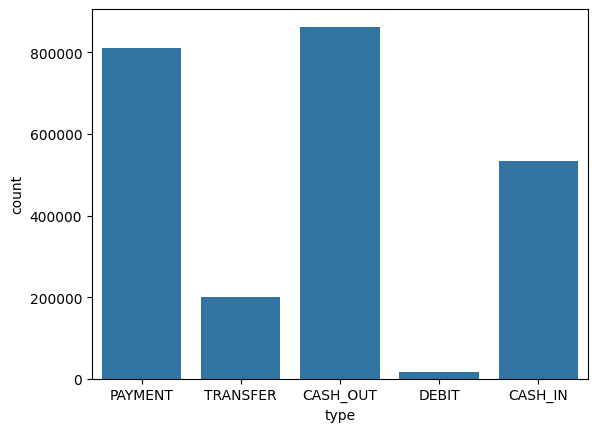

In [76]:
import seaborn as sb
sb.countplot(x = df["type"] , data = df)

<Axes: xlabel='type', ylabel='amount'>

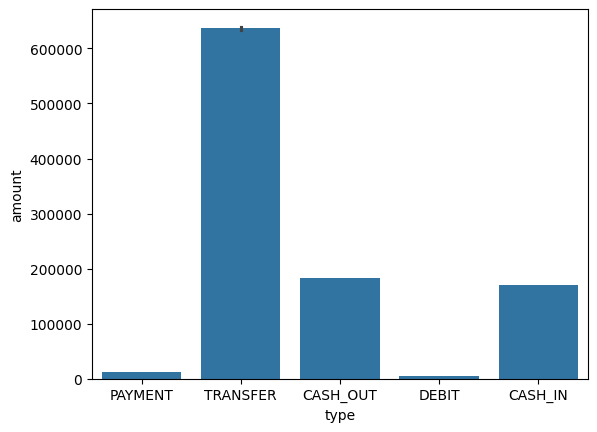

In [77]:
sb.barplot(x = 'type' , y='amount' , data = df)

In [78]:
df["isFraud"].value_counts()

,count
isFraud,
0.0,2423943
1.0,2264


In [120]:
df1 = pd.get_dummies(df["type"],drop_first=True)

In [121]:
for col in df1.columns:
  df1[col] = df1[col].apply(lambda x : 1 if x==True else 0)

In [122]:
df1.head()

,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0


In [123]:
df = pd.concat([df , df1] , axis =1)

In [124]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,0,0,1,0


In [125]:
X = df.drop(['type' , 'nameOrig' ,'nameDest' ,'isFraud'] , axis=1)

In [126]:
y = df["isFraud"]

In [127]:

X.shape , y.shape

((2912463, 11), (2912463,))

In [128]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [129]:
from sklearn.linear_model import LogisticRegression

model  = LogisticRegression()
model.fit(X_train , y_train)

LogisticRegression()

In [130]:
model.score(X_train , y_train)

0.9990952673210385

In [131]:
model.score(X_test , y_test)

0.9991004183741263